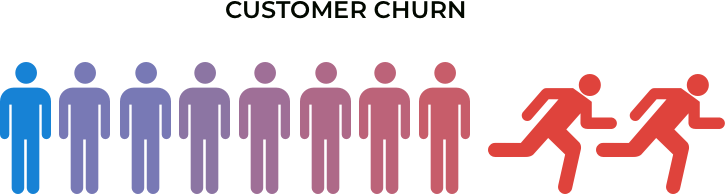

Customer churn is a fundamental problem for the telecommunication (Telco) industry. It is defined as the loss of customers moved from one Telco operator to another. If customer churn can be predicted in advance, such as “is this customer going to leave us within the next X months?”, Telco operators can apply business marketing policies to such churn customers to retain and increase the customer base. In particular, given millions of Telco customers, even reducing the 1% churn rate will lead to a significant profit increase.

We can roughly define the **Churn** analysis as the whole of analytical studies on “a customer”, “a product or service”, and “the probability of abandonment”. We aim to be aware of this situation (even the customer himself may not be aware of this situation) before the customer leaves us (approaching to leave) and then to take some preventive actions.

***Telco churn*** data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. Which customers have left, stayed, or signed up for their service shows?

**Business Problem**

It is desirable to develop a machine learning model that can predict customers who will leave the company. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

In this project, the dataset named Telco Customer Churn from Kaggle was used. Each row represents a customer, each column contains the customer's attributes. This dataset contains 21 columns (variables) and 7043 rows (customers) with information such as customerID, gender, Phone Service, and Internet Service. Table 1 shows the data types of the variables with 17 categorical and 4 numerical data.

Analysis of data columns to identify independent and dependent variables:

**X is the independent variables -  the variables we are using to make predictions**

* customerID - unique value identifying customer
* gender - whether the customer is a male or a female
* SeniorCitizen - whether the customer is a senior citizen or not (1, 0)
* Partner - whether the customer has a partner or not (Yes, No)
* Dependents - whether the customer has dependents or not (Yes, No). A dependent is a person who relies on another as a primary source of income,
* tenure - number of months the customer has stayed with the company
* PhoneService - whether the customer has a phone service or not (Yes, No)
* MultipleLines - whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup - whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection - whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport - whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV - whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies - whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract - type of contract according to duration (Month-to-month, One year, Two year)
* PaperlessBilling - bills issued in paperless form (Yes, No)
* PaymentMethod - payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic))
* MonthlyCharges - amount of charge for service on monthly bases
* TotalCharges - cumulative charges for service during subscription (tenure) period

**y is dependent variable - variable we are trying to predict or estimate**

* Churn – output value, predict variable

**Import libraries**

First, let's import the necessary Python libraries:

In [32]:
# for data manipulation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data splitting, transforming and model training
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# Setting Configurations:

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Data Reading**

***Let's import the dataset.***

The first step of the analysis consists of reading and storing the data in a Pandas data frame using the pandas.read_csv function.

In [46]:
df = pd.read_csv("data/raw/Churn.csv")

**Let's look at the first 5 observations of the dataset.**

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


**After using the head function, we can see that this database has some null values (using the info function we can confirm this), and our target variable is "Churn", we can also see that we have Numerical and Categoricals, here we can see too that we only have few variables.**

In [5]:
def check_data(dataframe, head=5):

    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)


check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-n

**#Column "TotalCharges" is an object, and we have to convert it to a numeric value** 

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isna()
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # Using errors=coerce. It will replace all non-numeric values with NaN.

**#Let's convert the dependent variable to binary variable.**

First of all, we digitize the target variable, the churn variable, and make it suitable for analysis. Because we will shape all other variables according to their relationship with churn.

In [7]:
# To find the number of churners and non-churners in the dataset:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df["Churn"] = df["Churn"].map({'No': 0, 'Yes': 1})

**To see the histogram chart:**
Histograms are a great way to explore columns with numerical data.

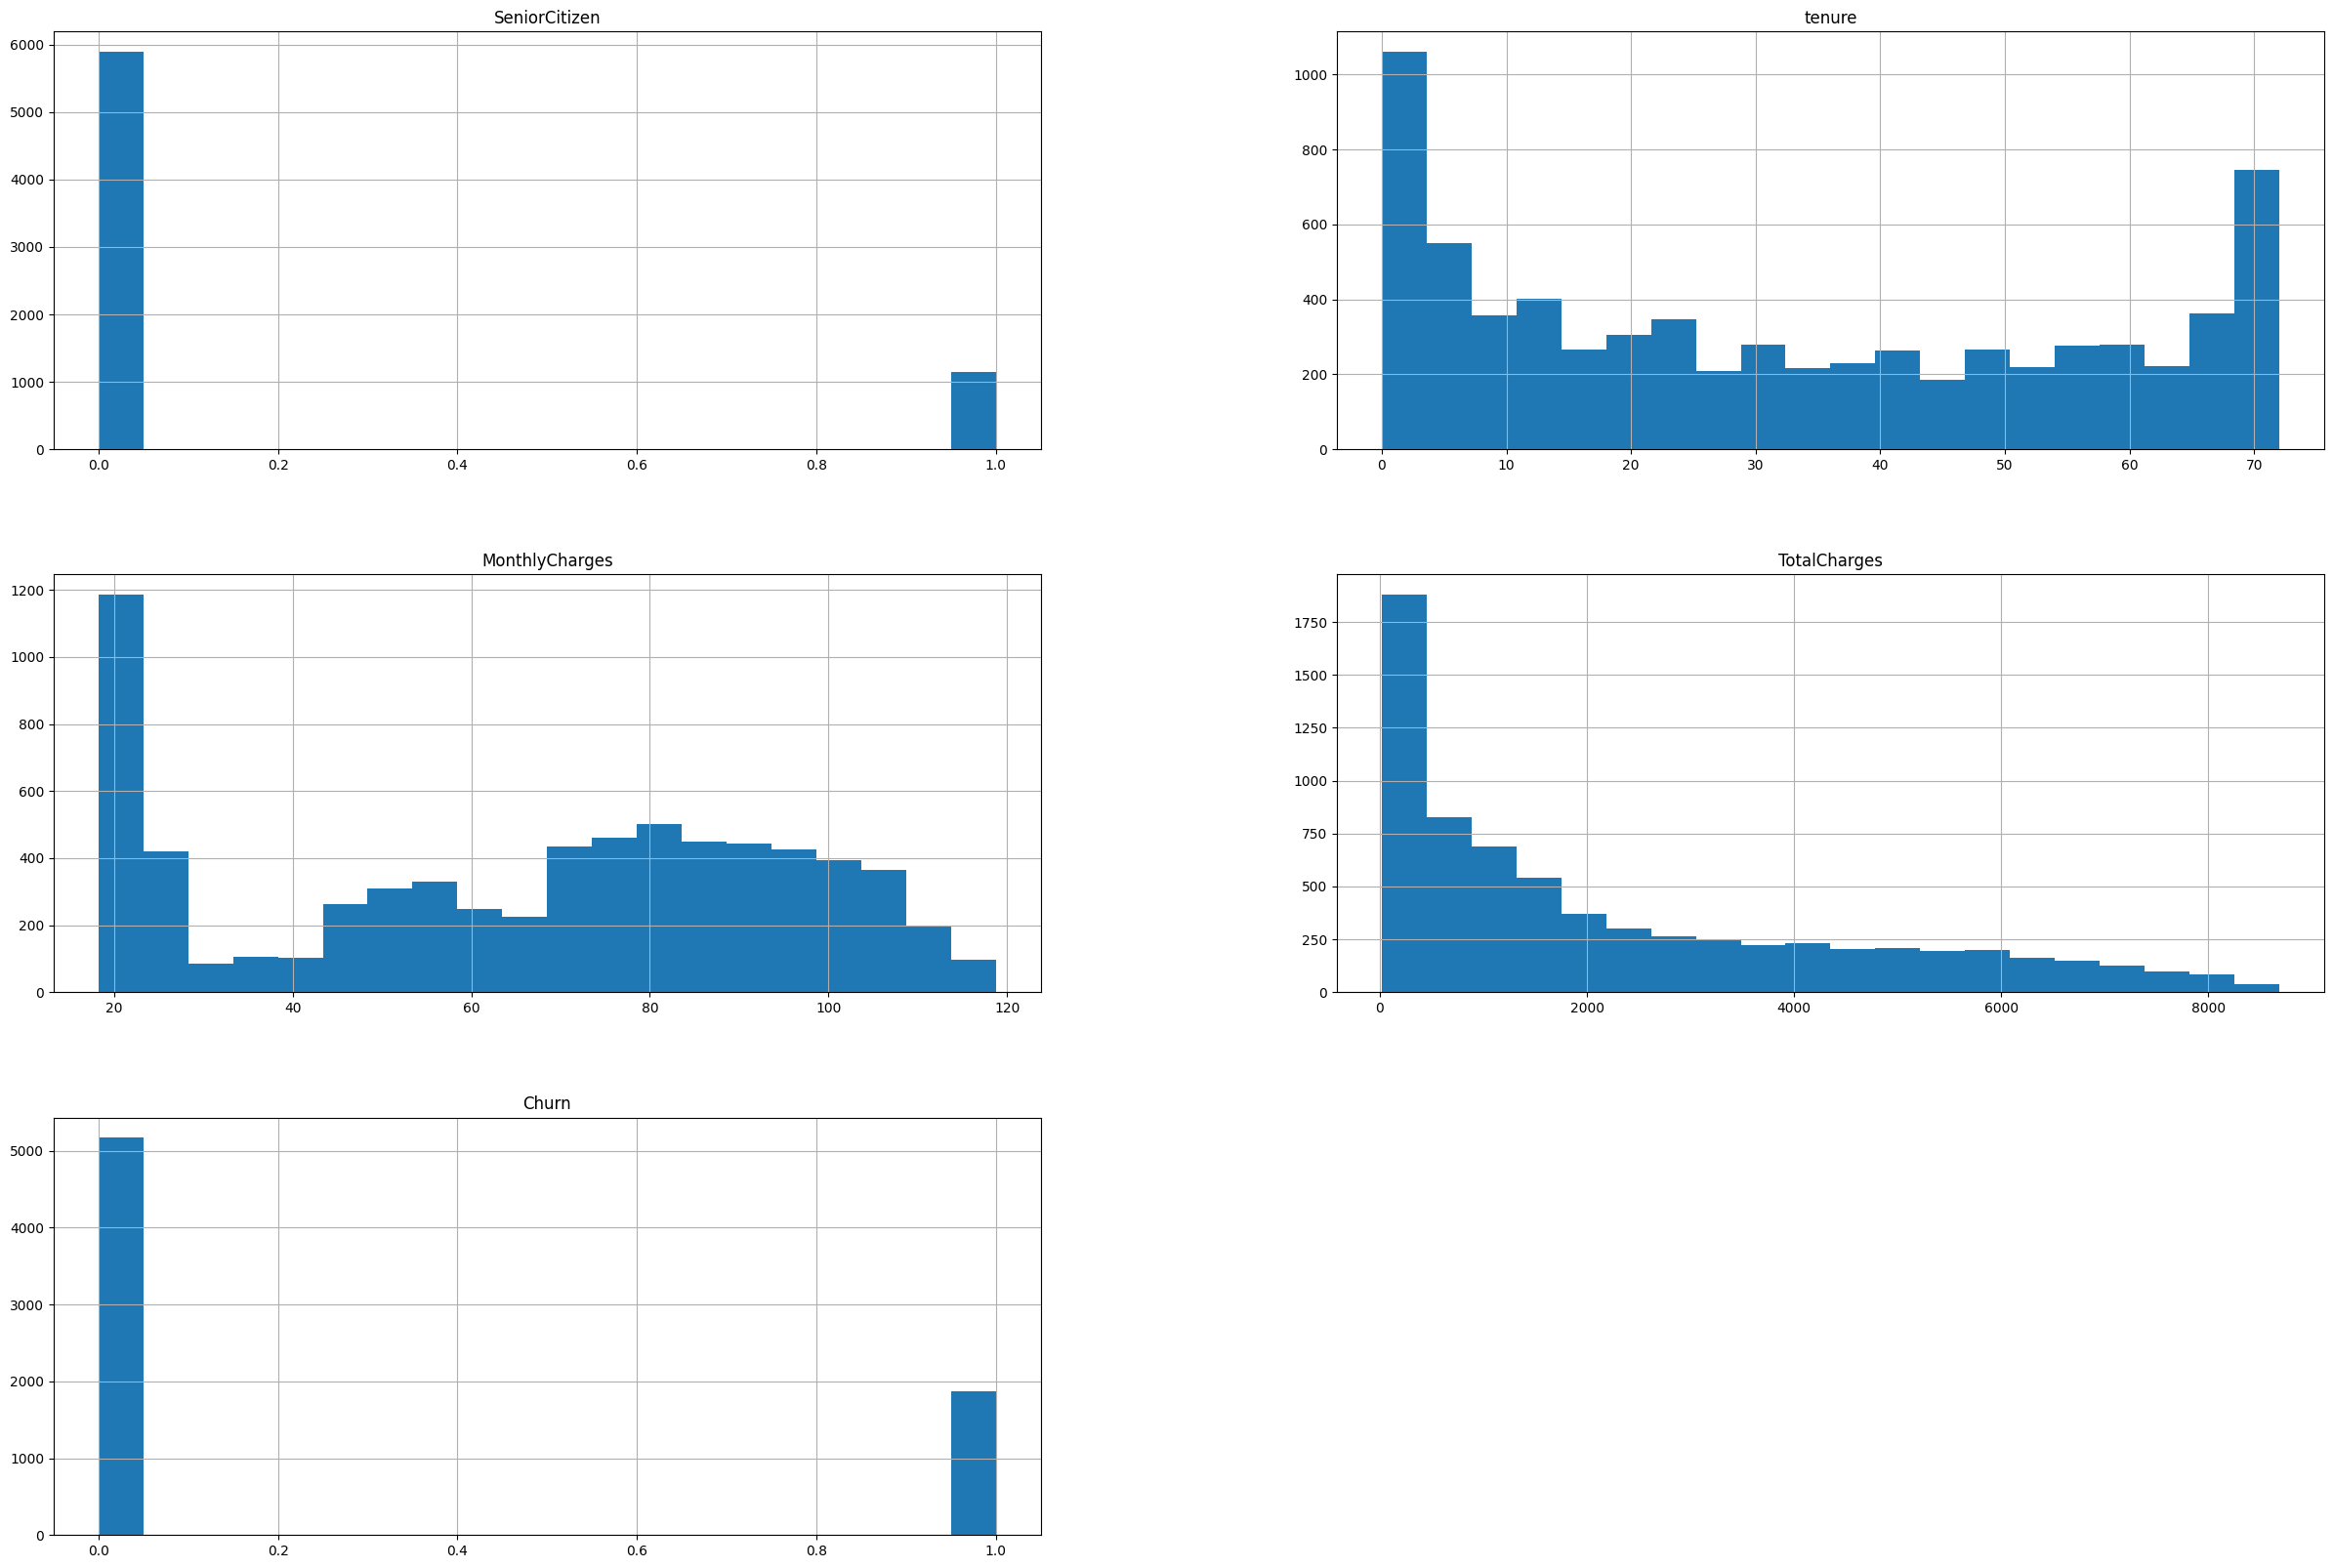

In [9]:
num_bins = 20
df.hist(bins=num_bins, figsize=(30,20))
plt.savefig("churn_histogram")
plt.show()

In [11]:
 def grab_col_names(dataframe, cat_th=10, car_th=20):  
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
            df: Dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Examples
    ------
        You just need to call the function and send the dataframe.)
        
        --> grab_col_names(df)

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables: 
        cat_cols + num_cols + cat_but_car = number of variables

    """

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols
num_cols


Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


['tenure', 'MonthlyCharges', 'TotalCharges']

# Analyze the numerical and categorical variables.

In [ ]:
def target_vs_category_visual(dataframe, target, categorical_col):
    plt.figure(figsize=(15, 8))
    sns.histplot(x=target, hue=categorical_col, data=dataframe, element="step", multiple="dodge")
    plt.title("State of Categorical Variables according to Churn ")
    plt.show()


for col in cat_cols:
    target_vs_category_visual(df, "Churn", col)

# Perform target variable analysis. 

**(The mean of the target variable according to the categorical variables, the mean of the numeric variables according to the target variable)**

In [12]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979

       MonthlyCharges
Churn                
0              61.265
1              74.441

       TotalCharges
Churn              
0          2555.344
1          1531.796



We continue the analysis by examining the relationship of the Churn variable with other variables.

In [13]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"CHURN_MEAN": dataframe.groupby(categorical_col)[target].mean()}))


for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

        CHURN_MEAN
gender            
Female       0.269
Male         0.262
         CHURN_MEAN
Partner            
No            0.330
Yes           0.197
            CHURN_MEAN
Dependents            
No               0.313
Yes              0.155
              CHURN_MEAN
PhoneService            
No                 0.249
Yes                0.267
                  CHURN_MEAN
MultipleLines               
No                     0.250
No phone service       0.249
Yes                    0.286
                 CHURN_MEAN
InternetService            
DSL                   0.190
Fiber optic           0.419
No                    0.074
                     CHURN_MEAN
OnlineSecurity                 
No                        0.418
No internet service       0.074
Yes                       0.146
                     CHURN_MEAN
OnlineBackup                   
No                        0.399
No internet service       0.074
Yes                       0.215
                     CHURN_MEAN
DeviceProtectio

* There is no significant difference in the number of departures of male and female customers.
* The churn rate of customers paying by electronic check seems high.
* Customers with monthly contracts seem to have a high churn rate.
* It seems that customers using fiber optic internet have a high churn rate.

**Perform outlier observation analysis.**

In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


**Perform a missing observation analysis.**

In [15]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

              n_miss  ratio
TotalCharges      11  0.160


**Perform correlation analysis.**

In [16]:
corr_matrix = df[num_cols].corr()
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


In [20]:
# Convert categorical columns to numeric for correlation (excluding customerID)
df_numeric = df.copy()
# Only encode categorical columns except customerID
cols_to_encode = [col for col in cat_cols if col != 'customerID']
df_numeric[cols_to_encode] = df_numeric[cols_to_encode].apply(lambda x: pd.factorize(x)[0])
# Calculate correlation with only numeric columns
df_numeric.select_dtypes(include=[np.number]).corrwith(df_numeric["Churn"]).sort_values(ascending=False)

Churn               1.000
MonthlyCharges      0.193
SeniorCitizen       0.151
Partner             0.150
MultipleLines       0.036
PhoneService        0.012
gender             -0.009
InternetService    -0.047
OnlineBackup       -0.074
Dependents         -0.164
PaperlessBilling   -0.192
TotalCharges       -0.199
StreamingTV        -0.206
StreamingMovies    -0.207
PaymentMethod      -0.263
DeviceProtection   -0.281
TechSupport        -0.330
OnlineSecurity     -0.333
tenure             -0.352
Contract           -0.397
dtype: float64

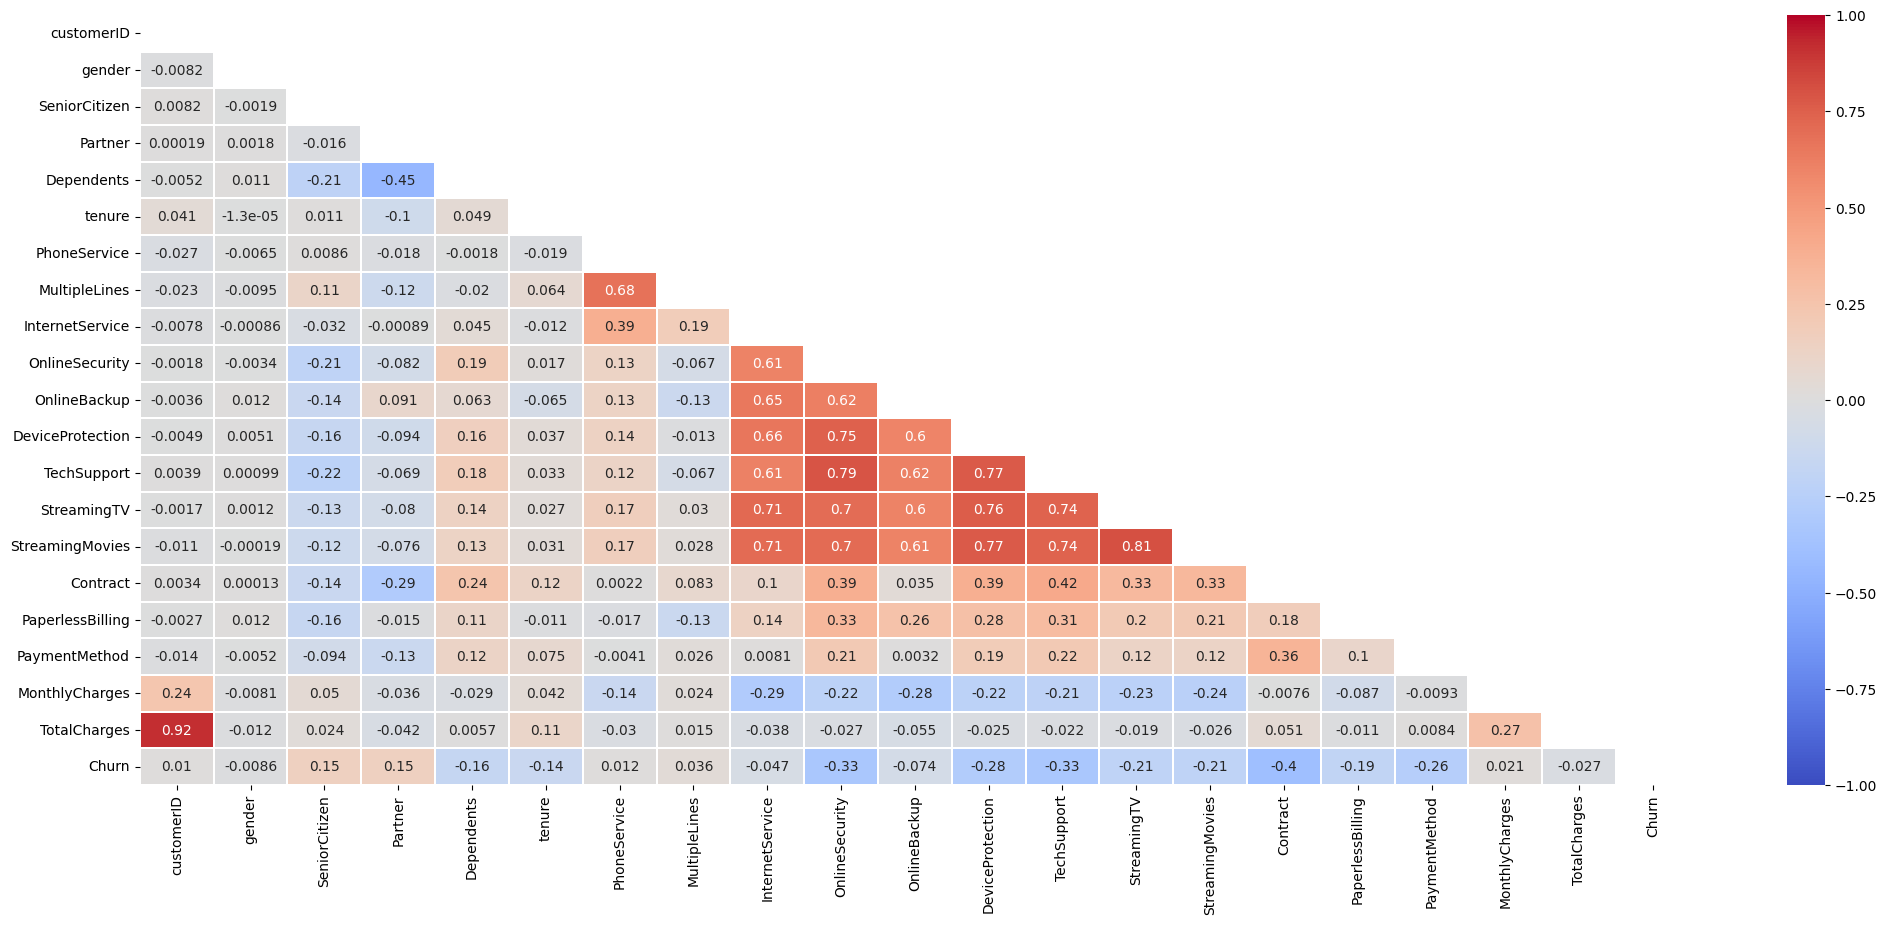

In [21]:
# Correlation between all variables
plt.figure(5, figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

findfont: Font family 'charter' not found.
findfont: Font family 'charter' not found.
findfont: Font family 'charter' not found.
findfont: Font family 'charter' not found.
findfont: Font family 'charter' not found.
findfont: Font family 'charter' not found.
findfont: Font family 'charter' not found.
findfont: Font family 'charter' not found.


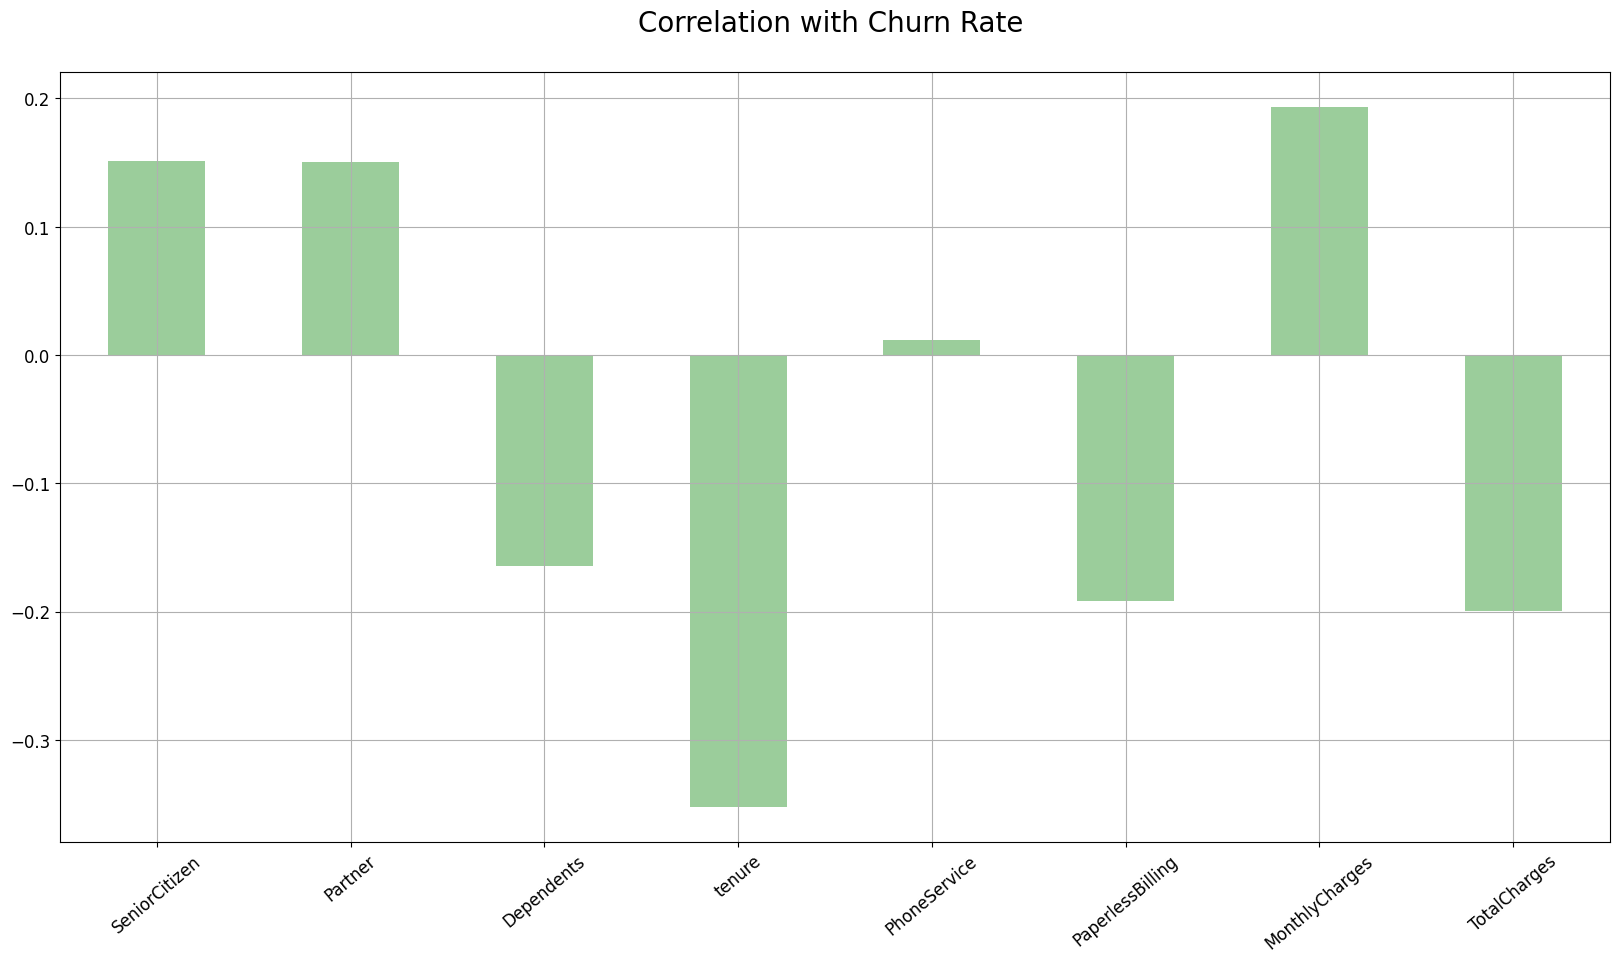

In [23]:
# Correlation between churn and selected boolean and numeric variables
plt.figure()
# Create a copy and encode categorical variables to numeric
ds_corr = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']].copy()

# Encode categorical columns
categorical_cols_to_encode = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in categorical_cols_to_encode:
    ds_corr[col] = pd.factorize(ds_corr[col])[0]

correlations = ds_corr.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (20, 10),
        fontsize = 12,
        color = '#9BCD9B',
        rot = 40, grid = True)

plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "20", fontfamily = "charter")

**By looking at the correlation results, we can make the following comments.**

* There is a positive correlation between churn and the age of customers - most senior citizens churn. Maybe there is some campaign by competitors targeting the senior population.
* Logically, longer tenure could also mean more loyalty and less churn risk.
* It is also logical that more monthly charges can result in more churn risk.
* However, it is interesting that total charges show a negative correlation to churn. The explanation can be that total charges also depend on the time the customer has spent with a company (tenure has a negative correlation). Also, it is questionable whether TotalCharges is an adequate variable to understand customer behavior and whether is it tracked by the customer.
* A positive correlation between paperless billing and churn is something that needs extra exploring (not clear what can be divers for that behavior).

**Take necessary actions for missing and contradictory observations.**

In [24]:
na_cols = missing_values_table(df, True)
df.dropna(inplace=True)

              n_miss  ratio
TotalCharges      11  0.160


In [25]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Perform the encoding operations.**

***Label Encode Binary data:*
Independent variables for machine learning algorithms can typically only have numerical values. Label encoding is used for all categorical variables with only two unique values.**

In [26]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    df = label_encoder(df, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 30 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  MultipleL

**Standardize for numeric variables.**

In [28]:
num_cols = [col for col in num_cols if col not in "customerID"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280,-1.162,-0.994
1,0.064,-0.261,-0.174
2,-1.240,-0.364,-0.960
3,0.512,-0.748,-0.195
4,-1.240,0.196,-0.940


In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.280,0,1,-1.162,-0.994,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,0.064,1,0,-0.261,-0.174,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,-1.240,1,1,-0.364,-0.960,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,0.512,0,0,-0.748,-0.195,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,-1.240,1,1,0.196,-0.940,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


**Build a model.**

In [ ]:
y = df['Churn']
X = df.drop(["customerID", "Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


'              precision    recall  f1-score   support\n\n           0       0.89      0.83      0.86      1665\n           1       0.49      0.60      0.54       445\n\n    accuracy                           0.78      2110\n   macro avg       0.69      0.72      0.70      2110\nweighted avg       0.80      0.78      0.79      2110\n'

In [34]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1665
           1       0.49      0.60      0.54       445

    accuracy                           0.78      2110
   macro avg       0.69      0.72      0.70      2110
weighted avg       0.80      0.78      0.79      2110



**Conclusion**

Presently telecom market is facing severe competition. Customer churn prediction has become an important issue of customer relationship management to retain valuable customers. Therefore by performing research, key factors of churn to retain customers and their influence on churn will be well understood.

Proper churn management can save a huge amount of money for the company. Thus the economic value of customer retention can be summarized as: 

* satisfied customers can bring new customers 
* long-term customers usually do not get influenced much by competitors 
* long-term customers tend to buy more 
* company can focus on satisfying existing customer’s needs 
* lost customers share negative experiences and thus will have a negative influence on the image of the company

Thus customer retention as a function of i.e. {Price, service quality, customer satisfaction, brand image} could lead to better customer loyalty.

**In future studies**, different methods will be tried to compare different algorithms and their model accuracy.

In [37]:
# Import additional models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

# Initialize models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=17),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=17),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=17),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=17),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=17, verbose=0),
    'SVM': SVC(kernel='rbf', probability=True, random_state=17),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'CatBoost': CatBoostClassifier(iterations=100, verbose=0, random_state=17)
}

# Train and evaluate all models
results = {}

print("Training and evaluating models...")
print("-" * 80)

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if hasattr(model, 'predict_proba') else roc_auc_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Model': model
    }
    
    print(f"{model_name:20} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

print("-" * 80)

Training and evaluating models...
--------------------------------------------------------------------------------
Logistic Regression  | Accuracy: 0.8052 | Precision: 0.6430 | Recall: 0.5620 | F1: 0.5998 | ROC-AUC: 0.8385
Random Forest        | Accuracy: 0.7886 | Precision: 0.6138 | Recall: 0.5018 | F1: 0.5522 | ROC-AUC: 0.8137
Gradient Boosting    | Accuracy: 0.8043 | Precision: 0.6452 | Recall: 0.5474 | F1: 0.5923 | ROC-AUC: 0.8375
AdaBoost             | Accuracy: 0.8071 | Precision: 0.6599 | Recall: 0.5310 | F1: 0.5885 | ROC-AUC: 0.8425
XGBoost              | Accuracy: 0.7825 | Precision: 0.5910 | Recall: 0.5274 | F1: 0.5574 | ROC-AUC: 0.8082
SVM                  | Accuracy: 0.8071 | Precision: 0.6691 | Recall: 0.5091 | F1: 0.5782 | ROC-AUC: 0.7937
KNN                  | Accuracy: 0.7588 | Precision: 0.5349 | Recall: 0.5456 | F1: 0.5402 | ROC-AUC: 0.7654
Naive Bayes          | Accuracy: 0.6607 | Precision: 0.4241 | Recall: 0.8558 | F1: 0.5671 | ROC-AUC: 0.8179
CatBoost             

In [38]:
# Create a DataFrame with results for better visualization
results_df = pd.DataFrame(results).T
results_df = results_df.drop('Model', axis=1).sort_values('Accuracy', ascending=False)

print("\nModel Comparison Summary (Sorted by Accuracy):")
print(results_df.to_string())

# Find the best model
best_model_name = results_df.index[0]
best_model = results[best_model_name]['Model']

print(f"\n{'='*50}")
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"{'='*50}")


Model Comparison Summary (Sorted by Accuracy):
                    Accuracy Precision Recall F1-Score ROC-AUC
AdaBoost               0.807     0.660  0.531    0.588   0.842
SVM                    0.807     0.669  0.509    0.578   0.794
Logistic Regression    0.805     0.643  0.562    0.600   0.839
Gradient Boosting      0.804     0.645  0.547    0.592   0.838
CatBoost               0.793     0.618  0.529    0.570   0.832
Random Forest          0.789     0.614  0.502    0.552   0.814
XGBoost                0.782     0.591  0.527    0.557   0.808
KNN                    0.759     0.535  0.546    0.540   0.765
Naive Bayes            0.661     0.424  0.856    0.567   0.818

Best Model: AdaBoost
Accuracy: 0.8071


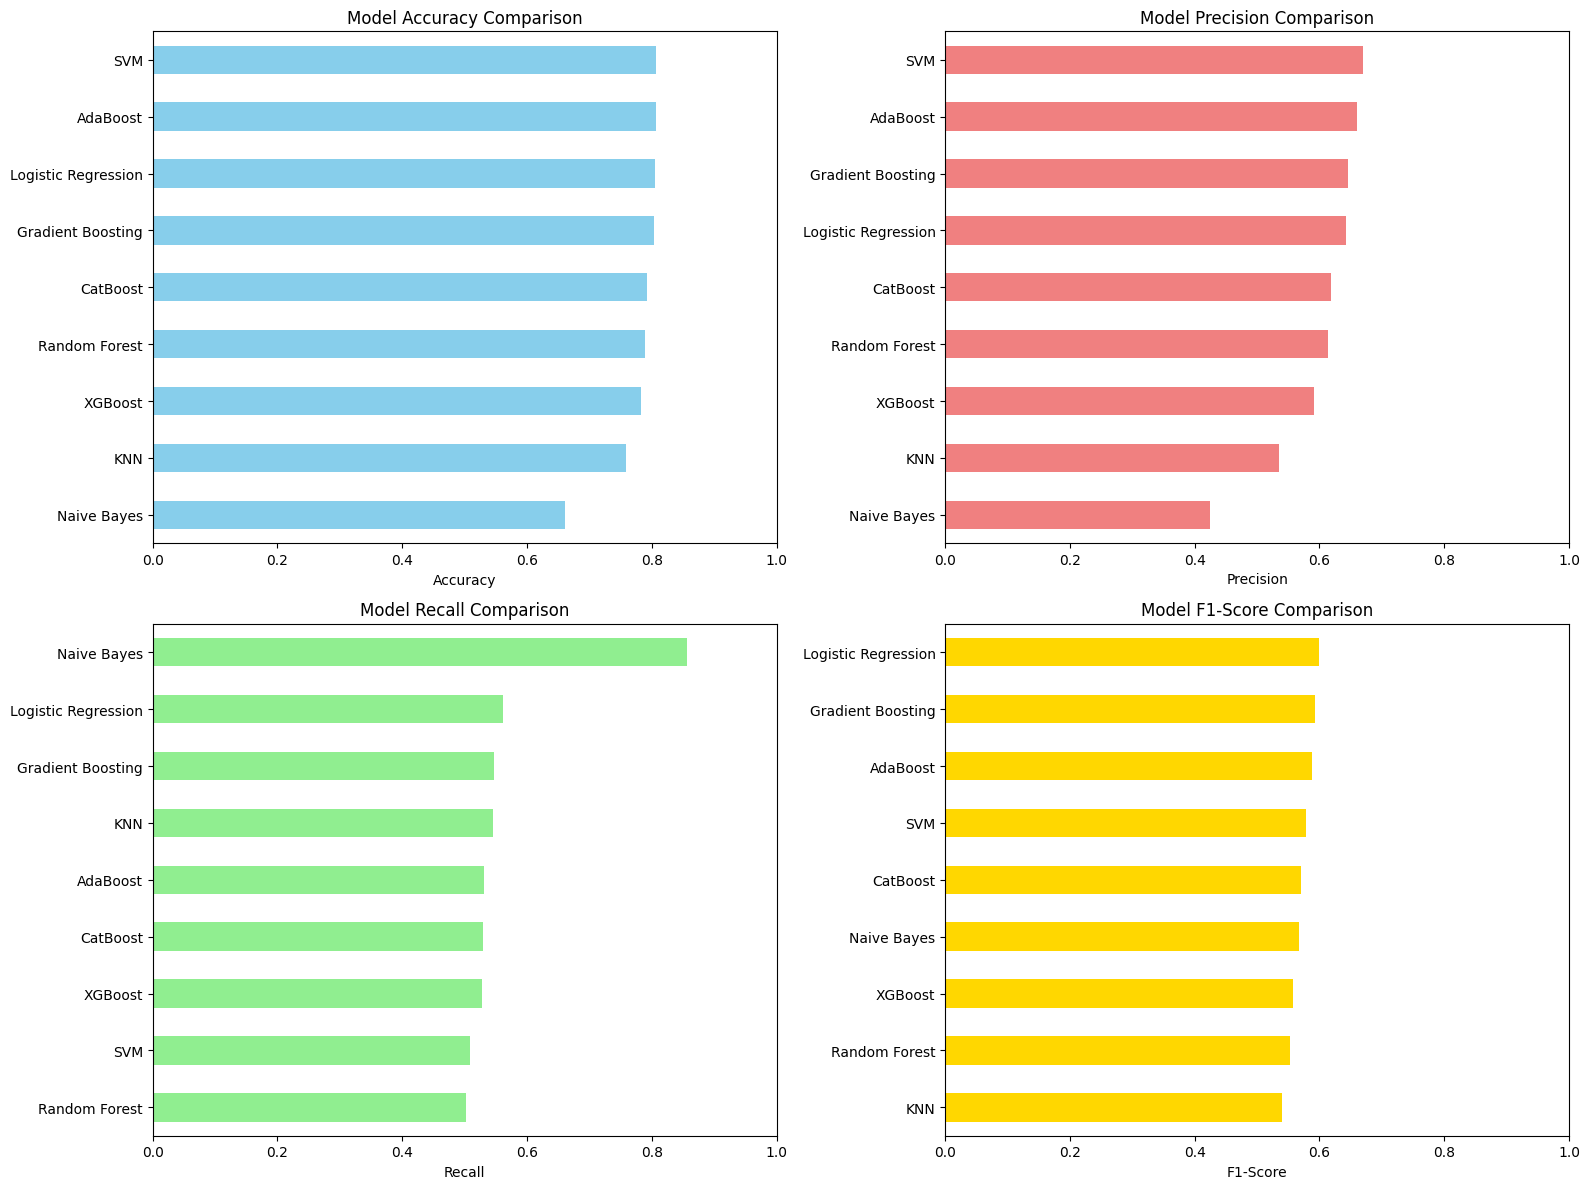

Model comparison visualization saved as 'model_comparison.png'


In [39]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy Comparison
ax1 = axes[0, 0]
results_df['Accuracy'].sort_values().plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_xlabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xlim([0, 1])

# Plot 2: Precision Comparison
ax2 = axes[0, 1]
results_df['Precision'].sort_values().plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_xlabel('Precision')
ax2.set_title('Model Precision Comparison')
ax2.set_xlim([0, 1])

# Plot 3: Recall Comparison
ax3 = axes[1, 0]
results_df['Recall'].sort_values().plot(kind='barh', ax=ax3, color='lightgreen')
ax3.set_xlabel('Recall')
ax3.set_title('Model Recall Comparison')
ax3.set_xlim([0, 1])

# Plot 4: F1-Score Comparison
ax4 = axes[1, 1]
results_df['F1-Score'].sort_values().plot(kind='barh', ax=ax4, color='gold')
ax4.set_xlabel('F1-Score')
ax4.set_title('Model F1-Score Comparison')
ax4.set_xlim([0, 1])

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("Model comparison visualization saved as 'model_comparison.png'")

**Explore Multiple Models**

Testing and comparing different machine learning algorithms to find the best performing model for customer churn prediction.


AdaBoost Hyperparameter Tuning

Searching for best parameters...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found: {'learning_rate': 1.2, 'n_estimators': 100}
Best cross-validation F1-Score: 0.5926

COMPARISON: Original vs Tuned AdaBoost
   Metric  Original AdaBoost  Tuned AdaBoost  Improvement
 Accuracy              0.807           0.807        0.000
Precision              0.660           0.659       -0.001
   Recall              0.531           0.533        0.002
 F1-Score              0.588           0.589        0.001
  ROC-AUC              0.842           0.841       -0.001

Best Tuned Model Metrics:
  Accuracy:  0.8071
  Precision: 0.6591
  Recall:    0.5328
  F1-Score:  0.5893
  ROC-AUC:   0.8406

Detailed Classification Report - Tuned AdaBoost:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1562
           1       0.66      0.53      0.59       548

    accuracy                          

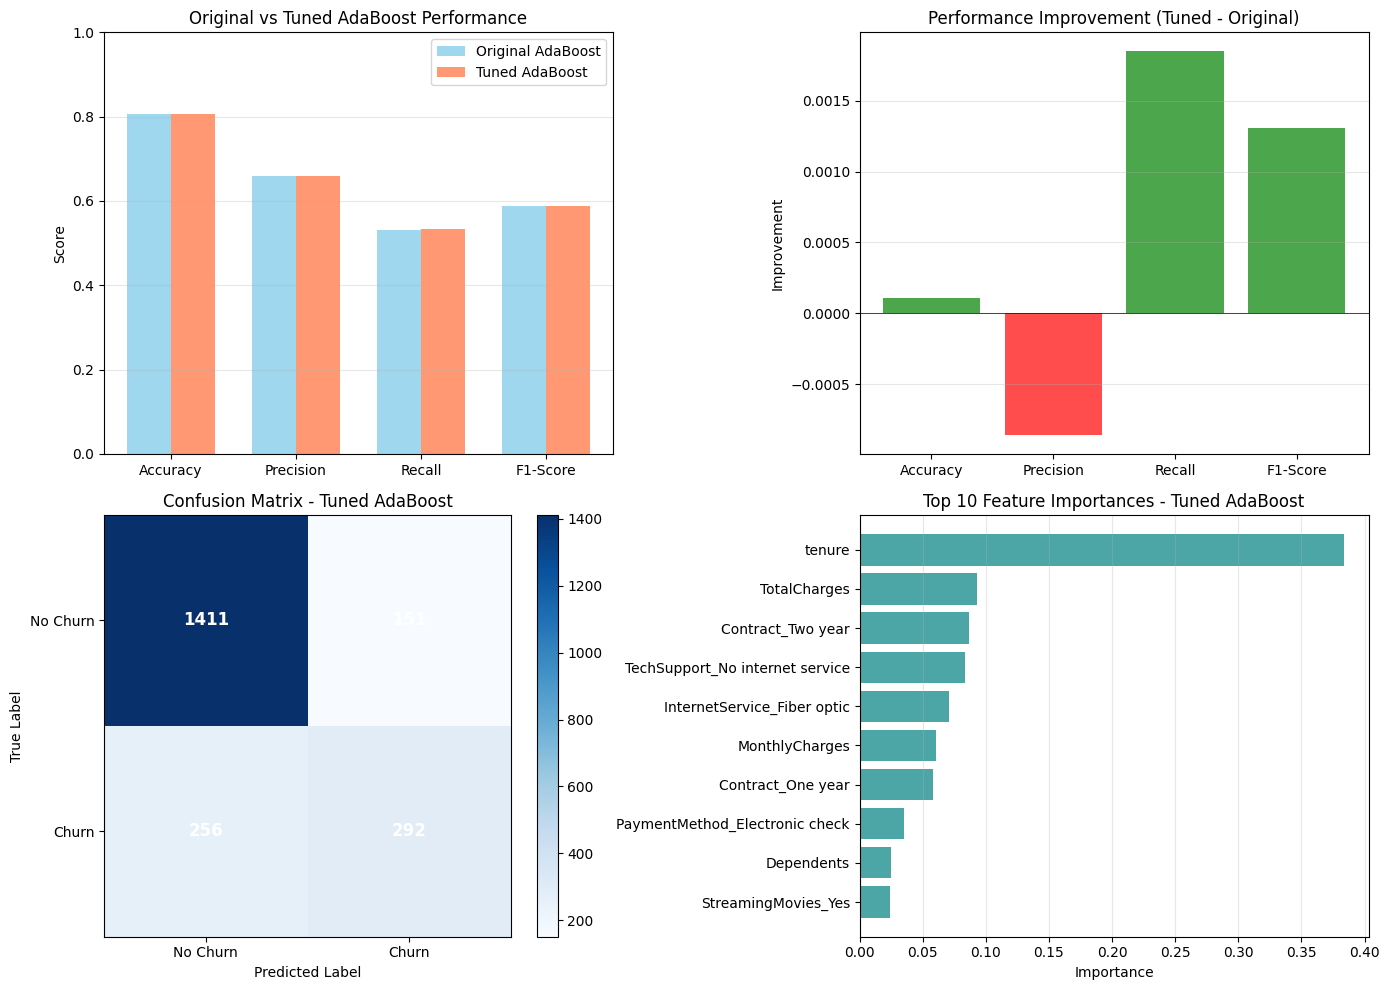


Tuning comparison visualization saved as 'adaboost_tuning_comparison.png'


In [43]:
# Hyperparameter Tuning for AdaBoost using GridSearchCV
from sklearn.model_selection import GridSearchCV

print("="*80)
print("AdaBoost Hyperparameter Tuning")
print("="*80)

# Define parameter grid for AdaBoost (remove 'algorithm' since not supported in sklearn)
adaboost_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.5, 0.8, 1.0, 1.2]
}

# Create AdaBoost base classifier
adaboost = AdaBoostClassifier(random_state=17)

# GridSearchCV with F1-score as scoring metric
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=adaboost_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nSearching for best parameters...")
grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation F1-Score: {grid_search.best_score_:.4f}")

# Get best model
best_adaboost = grid_search.best_estimator_

# Make predictions with tuned model
y_pred_tuned = best_adaboost.predict(X_test)
y_pred_proba_tuned = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate metrics for tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("\n" + "="*80)
print("COMPARISON: Original vs Tuned AdaBoost")
print("="*80)

comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Original AdaBoost': [0.807, 0.660, 0.531, 0.588, 0.842],
    'Tuned AdaBoost': [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned, roc_auc_tuned],
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Improvement'] = comparison_df['Tuned AdaBoost'] - comparison_df['Original AdaBoost']

print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print(f"Best Tuned Model Metrics:")
print(f"  Accuracy:  {accuracy_tuned:.4f}")
print(f"  Precision: {precision_tuned:.4f}")
print(f"  Recall:    {recall_tuned:.4f}")
print(f"  F1-Score:  {f1_tuned:.4f}")
print(f"  ROC-AUC:   {roc_auc_tuned:.4f}")
print("="*80)

# Detailed Classification Report and Visualizations
print("\n" + "="*80)
print("Detailed Classification Report - Tuned AdaBoost:")
print("="*80)
print(classification_report(y_test, y_pred_tuned))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
original = [0.807, 0.660, 0.531, 0.588]
tuned = [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]

# Plot 1: Metrics Comparison Bar Chart
ax1 = axes[0, 0]
x = range(len(metrics))
width = 0.35
ax1.bar([i - width/2 for i in x], original, width, label='Original AdaBoost', color='skyblue', alpha=0.8)
ax1.bar([i + width/2 for i in x], tuned, width, label='Tuned AdaBoost', color='coral', alpha=0.8)
ax1.set_ylabel('Score')
ax1.set_title('Original vs Tuned AdaBoost Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Improvement
ax2 = axes[0, 1]
improvements = [tuned[i] - original[i] for i in range(len(metrics))]
colors = ['green' if x > 0 else 'red' for x in improvements]
ax2.bar(metrics, improvements, color=colors, alpha=0.7)
ax2.set_ylabel('Improvement')
ax2.set_title('Performance Improvement (Tuned - Original)')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Confusion Matrix for Tuned Model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tuned)
ax3 = axes[1, 0]
im = ax3.imshow(cm, cmap='Blues', aspect='auto')
ax3.set_ylabel('True Label')
ax3.set_xlabel('Predicted Label')
ax3.set_title('Confusion Matrix - Tuned AdaBoost')
ax3.set_xticks([0, 1])
ax3.set_yticks([0, 1])
ax3.set_xticklabels(['No Churn', 'Churn'])
ax3.set_yticklabels(['No Churn', 'Churn'])
for i in range(2):
    for j in range(2):
        text = ax3.text(j, i, cm[i, j], ha="center", va="center", color="w", fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax3)

# Plot 4: Feature Importance (if available)
if hasattr(best_adaboost, 'feature_importances_'):
    ax4 = axes[1, 1]
    feature_importance = best_adaboost.feature_importances_
    top_indices = np.argsort(feature_importance)[-10:]
    top_features = X_train.columns[top_indices]
    top_importances = feature_importance[top_indices]
    ax4.barh(range(len(top_features)), top_importances, color='teal', alpha=0.7)
    ax4.set_yticks(range(len(top_features)))
    ax4.set_yticklabels(top_features)
    ax4.set_xlabel('Importance')
    ax4.set_title('Top 10 Feature Importances - Tuned AdaBoost')
    ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('adaboost_tuning_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nTuning comparison visualization saved as 'adaboost_tuning_comparison.png'")


In [44]:
# Save the best tuned AdaBoost model as a .pkl file
import joblib
joblib.dump(best_adaboost, 'best_adaboost_model.pkl')
print("Best tuned AdaBoost model saved as 'best_adaboost_model.pkl'")

Best tuned AdaBoost model saved as 'best_adaboost_model.pkl'


**Hyperparameter Tuning for AdaBoost**

Fine-tuning AdaBoost parameters to optimize Accuracy, Precision, Recall, and F1-Score.
